In [1]:
import os, sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import dataClass as dc

## Load Raw Data

In [2]:
d = dc.dataMethods(data_path="data")
d.get_df_raw.head()

Loaded: White Wine Data	Length: 1599
Loaded: Red Wine Data	Length: 4898

Unified Data, with Length: 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,white
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,white
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,white
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white


# Normalizing / Scaling Data

In [3]:
d.digitizeType(d.get_df_raw)
d.get_df_raw.head()

Completed


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
d.scaleData(d.get_df_raw,scaler_type = "standard")
d.get_df_scaled.head()

Scaled data using method: standard


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.75019


### Using Silhouette to find ideal number of clusters [K Means]
We would want to cluster our dataset for multiple reasons.

- See how well we can differentiate the type of wine [red/wine] (Before we use a classification model)
- See if we can cluster our wines, to allow for stratification for stable models. (Here we know we only need 2 clusters)


For stratification we will notice that there is an "ideal" number of clusters
It is important to determine this, otherwise our data is not interpreted well.
We will also notice that the ideal number of clusters is not the same if we only use one type of wine.



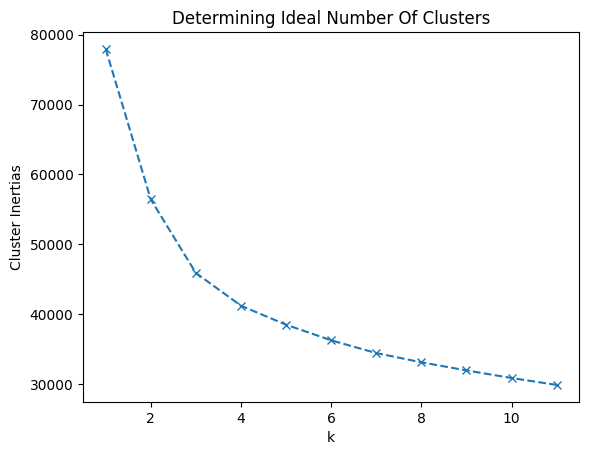

The ideal number of clusters, for the scaled joined data (aka both wines) is around: 3


In [5]:
X = d.get_df_scaled.drop(columns = ["quality"]) # Pull the scaled dataset and remove the quality feature

d.elbowMethod(X,range(1,12))
print("The ideal number of clusters, for the scaled joined data (aka both wines) is around: 3")

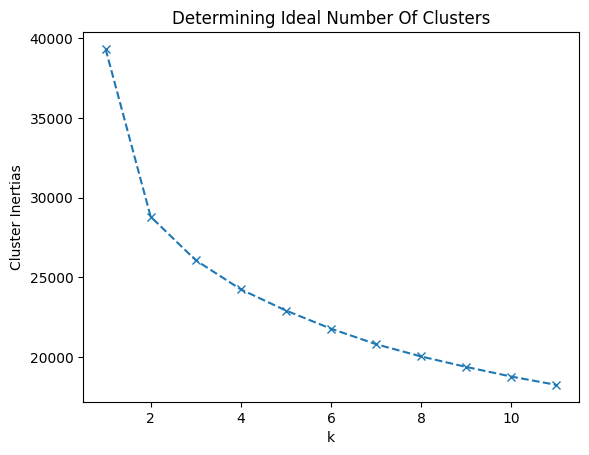

The ideal number of clusters, for the red wine data is around: 2


In [6]:
X = d.get_df_scaled.drop(columns = ["quality"])     # Pull the scaled dataset and remove the quality feature
X = X[X.type == X.type.min()]                           # Select only Red Wine

d.elbowMethod(X,range(1,12))
print("The ideal number of clusters, for the red wine data is around: 2")

In [7]:
# At this point we could initiate data clustering.
# For the only red wine data we will use 2 clusters, with default settings.

from sklearn.cluster import KMeans
clusterModel = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=12).fit(X)

X_Clustered = X.copy()
X_Clustered["cluster"] = clusterModel.labels_

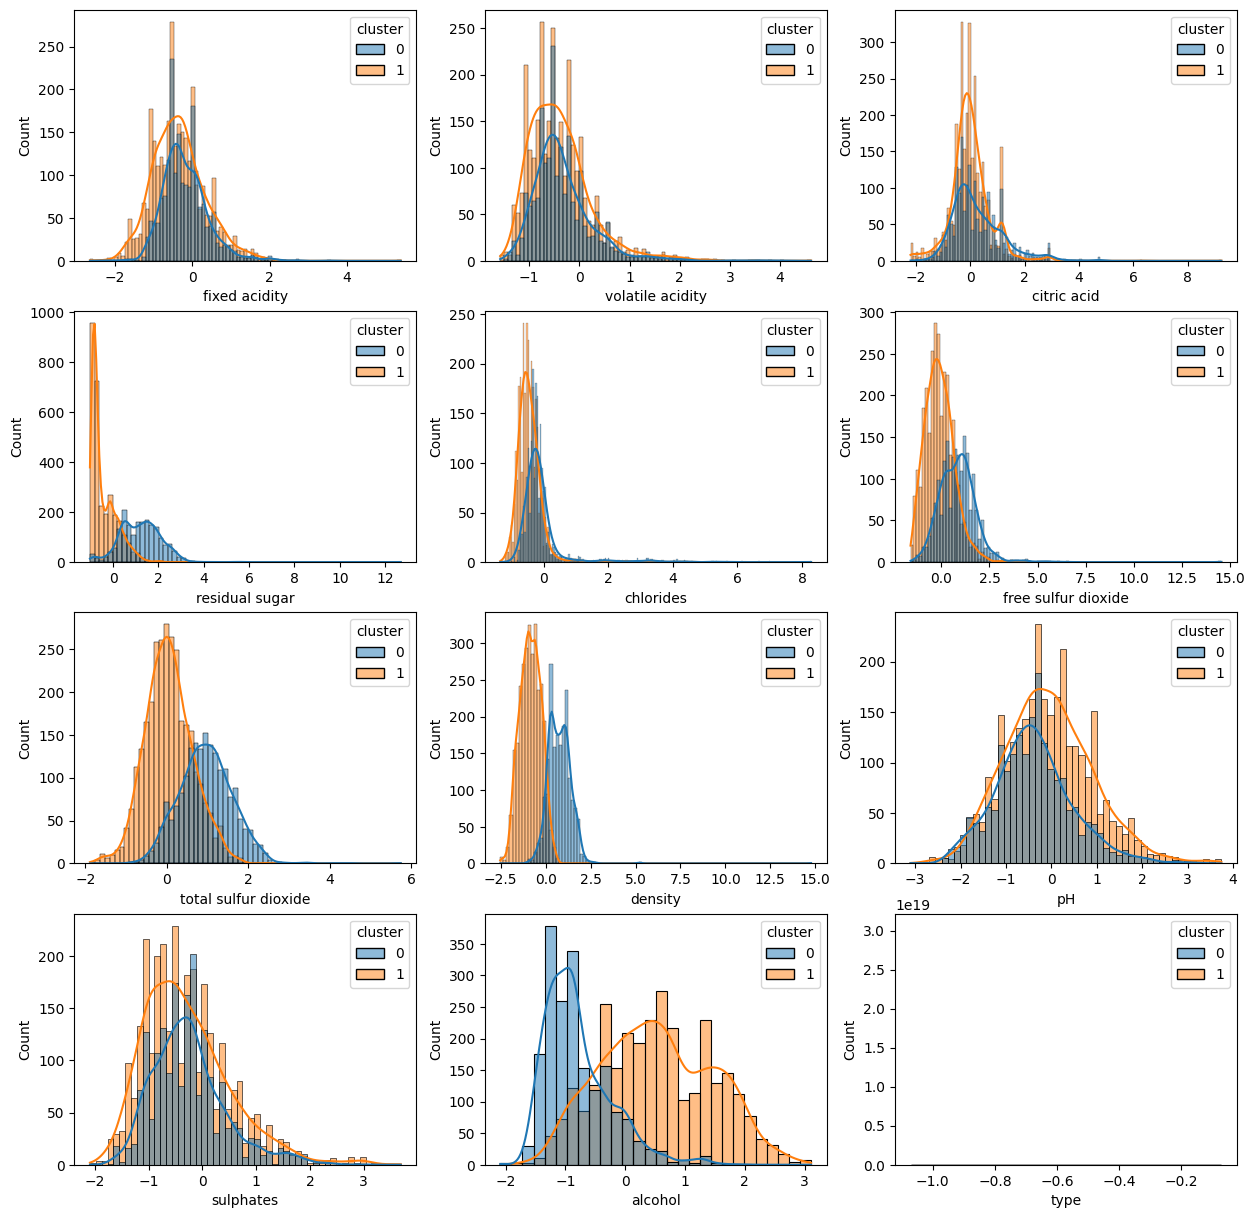

In [8]:
## By plotting the various features, we are able to clearly identify what are the defining features of each cluster.
## The "type" plot is empty, as we are only working with the Red Wine.
dc.plot_tileHistogram(X_Clustered,hue="cluster")

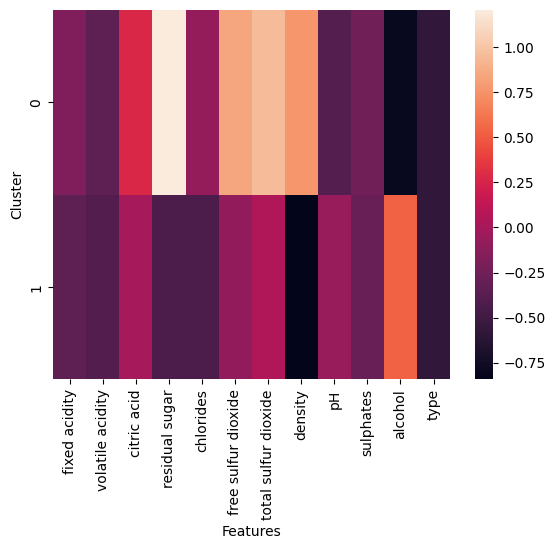

In [9]:
# We can also map the centre/mean of each feature in a more concise way, than multiple histograms.
# This way we can quickly and clearly identify where the clusters differentiate.

dc.plot_centreHeatmap(X,clusterModel)

## 3D Visualisation of Clusters (via PCA Scaling)
As our dataset contains more than 3 variables we can't visualise it as a 3D plot. 
By using PCA scaling, we can transform our data into less dimentions by dropping features deamed less important.

PCA scaling is also used for preprocessesing scaling as seen in the DataExploration notebook, and can be very usefull for clustering and ML


In [10]:
dc.plot_Cluster3D(X,X_Clustered.cluster)